In [ ]:
#####c final version ######

In [1]:
from clr_callback import *
from keras.optimizers import *

Using TensorFlow backend.


In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#hyper-parameters
batch_size = 100
num_classes = 10
epochs = 80
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#network architecture

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
#initiate optimizers according to experiment

opt = keras.optimizers.rmsprop()

clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)


In [7]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        horizontal_flip=True,  # randomly flip images
       )

datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    callbacks = [clr_triangular],
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/80
500/500 [==============================] - 20s 41ms/step - loss: 1.8445 - acc: 0.3369 - val_loss: 1.3421 - val_acc: 0.5228
Epoch 2/80
500/500 [==============================] - 19s 38ms/step - loss: 1.5268 - acc: 0.4604 - val_loss: 1.3670 - val_acc: 0.5164
Epoch 3/80
500/500 [==============================] - 18s 36ms/step - loss: 1.4795 - acc: 0.4847 - val_loss: 1.3576 - val_acc: 0.5441
Epoch 4/80
500/500 [==============================] - 18s 37ms/step - loss: 1.5271 - acc: 0.4743 - val_loss: 1.4324 - val_acc: 0.5135
Epoch 5/80
500/500 [==============================] - 18s 36ms/step - loss: 1.5002 - acc: 0.4833 - val_loss: 1.1166 - val_acc: 0.6066
Epoch 6/80
500/500 [==============================] - 18s 35ms/step - loss: 1.3502 - acc: 0.5329 - val_loss: 1.0479 - val_acc: 0.6373
Epoch 7/80
500/500 [==============================] - 18s 37ms/step - loss: 1.2333 - acc: 0.5752 - val_loss: 0.9803 - val_acc: 0.6578
Epoch 8/80
500/500 [==============================] - 19s 38ms

Epoch 62/80
500/500 [==============================] - 18s 37ms/step - loss: 1.2684 - acc: 0.5635 - val_loss: 1.3418 - val_acc: 0.5322
Epoch 63/80
500/500 [==============================] - 18s 36ms/step - loss: 1.2299 - acc: 0.5768 - val_loss: 1.0665 - val_acc: 0.6262
Epoch 64/80
500/500 [==============================] - 19s 38ms/step - loss: 1.2038 - acc: 0.5844 - val_loss: 1.0755 - val_acc: 0.6227
Epoch 65/80
500/500 [==============================] - 18s 37ms/step - loss: 1.2099 - acc: 0.5864 - val_loss: 1.0414 - val_acc: 0.6427
Epoch 66/80
500/500 [==============================] - 18s 36ms/step - loss: 1.2407 - acc: 0.5745 - val_loss: 1.1217 - val_acc: 0.6195
Epoch 67/80
500/500 [==============================] - 18s 37ms/step - loss: 1.2650 - acc: 0.5653 - val_loss: 1.1204 - val_acc: 0.6227
Epoch 68/80
500/500 [==============================] - 19s 39ms/step - loss: 1.2990 - acc: 0.5556 - val_loss: 1.1907 - val_acc: 0.6076
Epoch 69/80
500/500 [==============================] - 

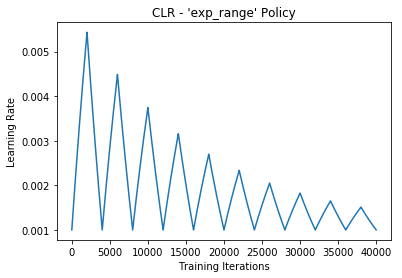

In [8]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy CLR ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

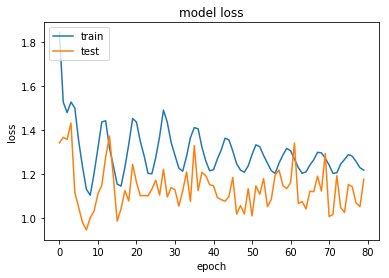

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()